In [144]:
from sqlalchemy import create_engine, text
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd   
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CBS2022 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2022')

In [3]:
CBS2021 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2021')

In [4]:
CBS2020 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2020')

In [5]:
CBS2019 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2019')

In [6]:
CBS2018 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2018')

In [7]:
CBS2017 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2017')

In [8]:
CBS2016 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2016') #explore rows on down

In [9]:
CBS2015 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2015')

In [10]:
CBS2014 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2014')

In [53]:
CBS2013 = pd.read_csv("..\data\CBS2013.csv")

In [12]:
CBS2012 = pd.read_csv("..\data\CBS2012.csv")

In [13]:
CBS2011 = pd.read_csv("..\data\CBS2011.csv")

In [14]:
CBS2010 = pd.read_csv("..\data\CBS2010.csv")

In [15]:
CBS2009 = pd.read_csv("..\data\CBS2009.csv")

In [16]:
CBS2008 = pd.read_csv("..\data\CBS2008.csv")

In [17]:
CBS2007 = pd.read_csv("..\data\CBS2007.csv")

In [18]:
CBS2022.head()

,State,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)",...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
0,AK,3088,2547,2439,0.7898,2615,473,0,205,692,...,279,279,85,0.3047,23,106,173,0,0,0
1,AL,2714,2229,1757,0.6474,2034,646,34,349,1027,...,73,73,73,1.0000,6,20,53,0,9,0
2,AR,2318,1787,1117,0.4819,1920,398,0,195,778,...,22,22,22,1.0000,5,12,10,0,0,0
3,AZ,6162,5467,5089,0.8259,4272,1808,82,807,2564,...,698,698,419,0.6003,148,482,216,0,23,3
4,CA,68607,64427,52234,0.7614,52839,15134,634,9282,26344,...,18377,18235,14878,0.8096,2102,6203,12167,7,526,487


In [90]:
CBS2013

,State,"Total Year-Round Beds (ES,TH,RRH,SH)","Total Non-DV Year-Round Beds (ES,TH,RRH,SH)","Total HMIS Year-Round Beds (ES,TH,RRH,SH)","HMIS Participation Rate (ES,TH,RRH,SH)",Total Emergency Shelter (ES) Beds (excluding seasonal+overflow),Total Transitional Housing (TH) Beds,Total Rapid Rehousing (RRH) Beds,Total Safe Haven (SH) Beds,"Total Units for Households with Children (ES,TH,RRH)",...,Total PSH Beds,Total Year-Round PSH Beds,Total Non-DV Year-Round PSH Beds,Total HMIS Year-Round PSH Beds,PSH HMIS Participation Rate,Total Chronic Homeless PSH Beds,Total PSH Units for Households with Children,Total PSH Beds for Households with Children,Total PSH Beds for Households without Children,Total PSH Beds for Households with only Children
0,AK,1895,1460,1171,80.20%,1204,691,0,0,215,...,792,792,792,764,96.50%,120,65,223,569,0
1,AL,4077,3553,1974,55.60%,1943,2095,5,34,526,...,2400,2400,2400,1548,64.50%,679,281,851,1549,0
2,AR,2561,1963,1156,58.90%,1655,847,59,0,281,...,1006,1006,1000,667,66.70%,74,128,324,682,0
3,AZ,8982,7425,6574,88.50%,4173,4570,199,40,1503,...,6785,6785,6785,4930,72.70%,969,780,2191,4594,0
4,CA,45411,40146,31307,78.00%,16680,27977,547,207,6252,...,41633,41633,41485,27409,66.10%,12347,5064,14229,27404,0
5,CO,7744,7028,6022,85.70%,3153,4358,208,25,1419,...,2996,2996,2996,2355,78.60%,1061,265,626,2370,0
6,CT,3634,3322,3068,92.40%,2158,1284,192,0,550,...,5817,5817,5745,4824,84.00%,2046,835,2464,3353,0
7,DC,7854,7754,7183,92.60%,3856,2812,1186,0,1469,...,6224,6224,6180,3724,60.30%,4641,833,2674,3550,0
8,DE,1263,1165,697,59.80%,552,698,3,10,205,...,552,552,552,492,89.10%,207,15,43,509,0
9,FL,24292,21495,16032,74.60%,9923,13337,854,178,3092,...,14592,14592,14204,8459,59.60%,3811,2219,6166,8426,0


In [108]:
totalperp2022 = CBS2022[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2022['State']= '2022'
totalperp2022=totalperp2022.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [110]:
totalperp2021 = CBS2021[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2021['State']= '2021'
totalperp2021=totalperp2021.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [111]:
totalperp2020= CBS2020[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2020['State']= '2020'
totalperp2020=totalperp2020.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [112]:
totalperp2019 = CBS2019[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2019['State']= '2019'
totalperp2019=totalperp2019.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [113]:
totalperp2018 = CBS2018[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2018['State']= '2018'
totalperp2018=totalperp2018.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [114]:
totalperp2017 = CBS2017[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2017['State']= '2017'
totalperp2017=totalperp2017.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [115]:
totalperp2016 = CBS2016[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2016['State']= '2016'
totalperp2016=totalperp2016.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [116]:
totalperp2015 = CBS2015[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2015['State']= '2015'
totalperp2015=totalperp2015.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [117]:
totalperp2014 = CBS2014[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2014['State']= '2014'
totalperp2014=totalperp2014.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [123]:
CBS2013[['State','HMIS Participation Rate (ES,TH,RRH,SH)']].tail(1)
tp =CBS2013[['State','HMIS Participation Rate (ES,TH,RRH,SH)']].tail(1)

tp.iloc[0]=0.7003
tp['State']= '2013'
totalperp2013=tp
totalperp2013=totalperp2013.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH,RRH,SH)':'Participation Rate'})

In [126]:
tp = CBS2012[['State','HMIS Participation Rate (ES,TH,SH)']].tail(1)

tp.iloc[0]=0.6980
tp['State']= '2012'
totalperp2012=tp
totalperp2012=totalperp2012.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH,SH)':'Participation Rate'})

In [127]:
tp = CBS2011[['State','HMIS Participation Rate (ES,TH,SH)']].tail(1)

tp.iloc[0]=0.6797
tp['State']= '2011'
totalperp2011=tp
totalperp2011=totalperp2011.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH,SH)':'Participation Rate'})

In [128]:
tp = CBS2010[['State','HMIS Participation Rate (ES,TH,SH)']].tail(1)

tp.iloc[0]=0.6779
tp['State']= '2010'
totalperp2010=tp
totalperp2010=totalperp2010.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH,SH)':'Participation Rate'})

In [129]:
tp = CBS2009[['State','HMIS Participation Rate (ES,TH,SH)']].tail(1)

tp.iloc[0]=0.6599
tp['State']= '2009'
totalperp2009=tp
totalperp2009=totalperp2009.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH,SH)':'Participation Rate'})

In [130]:
tp = CBS2008[['State','HMIS Participation Rate (ES,TH,SH)']].tail(1)

tp.iloc[0]=0.6271
tp['State']= '2008'
totalperp2008=tp
totalperp2008=totalperp2008.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH,SH)':'Participation Rate'})

In [131]:
tp = CBS2007[['State','HMIS Participation Rate (ES,TH)']].tail(1)

tp.iloc[0]=0.5979
tp['State']= '2007'
totalperp2007=tp
totalperp2007=totalperp2007.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH)':'Participation Rate'})

In [132]:
totalperp2007

,Year,Participation Rate
54,2007,0.5979


In [133]:
all_perp_rates = pd.concat([totalperp2022,totalperp2021,totalperp2020,totalperp2019,totalperp2018,totalperp2017,totalperp2016,totalperp2015,totalperp2014,totalperp2013,totalperp2012,totalperp2011,totalperp2010,totalperp2009,totalperp2008,totalperp2007], axis=0)

<Axes: title={'center': 'Participation Rate for Emergency shelters, Transitional housing, & Safe-Havens 2007-2022'}, xlabel='Year', ylabel='Participation Rate'>

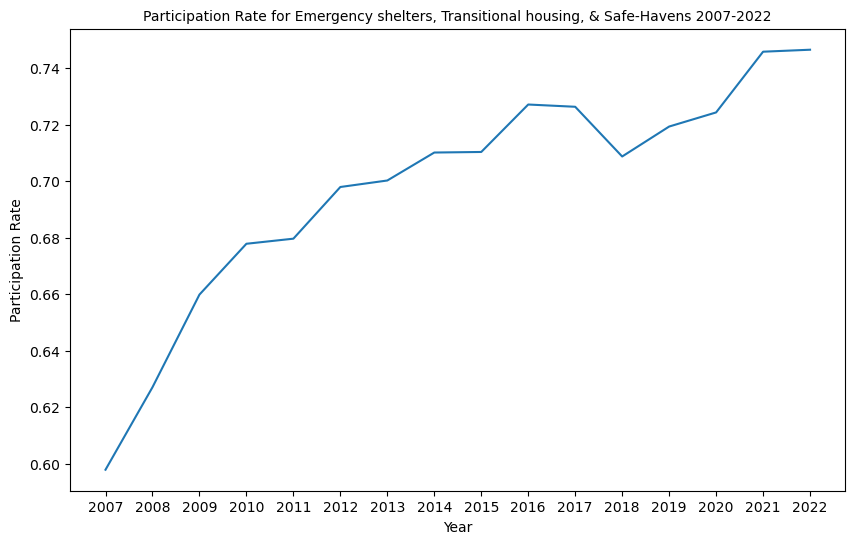

In [158]:
all_perp_rates=all_perp_rates.sort_values('Year')
plt.figure(figsize=(10, 6))
plt.title('Participation Rate for Emergency shelters, Transitional housing, & Safe-Havens 2007-2022', fontsize = 10)
sns.lineplot(x=all_perp_rates["Year"],y=all_perp_rates["Participation Rate"])

In [212]:
edited2022 = CBS2022[['Total Year-Round Beds (RRH)','Total HMIS Year-Round Beds (RRH)','Total Year-Round Beds (PSH)','Total HMIS Year-Round Beds (PSH)']]
# edited2022['Total Year-Round Beds(RRH+PSH)']=['Total Year-Round Beds (RRH)'+'Total Year-Round Beds (PSH)']
edited2022
x = edited2022.loc[55]
x['Total Year-Round Beds(RRH+PSH)']=x['Total Year-Round Beds (RRH)']+x['Total Year-Round Beds (PSH)']
x['Total HMIS Year-Round Beds(RRH+PSH)']= x['Total HMIS Year-Round Beds (RRH)']+x['Total HMIS Year-Round Beds (PSH)']
x['Participation Rate']= x['Total HMIS Year-Round Beds(RRH+PSH)']/ x['Total Year-Round Beds(RRH+PSH)']
ex = pd.DataFrame(x).reset_index().tail(1).rename(columns={'index':'Year',55:'Participation Rate'})
ex['Year']= '2022'
ex

,Year,Participation Rate
6,2022,0.808875
